In [2]:
import numpy as np
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import ydata_profiling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
data = pd.read_csv('C:/Users/User/Downloads/ford/ford.csv')
data_copy = data.copy()
data_copy
#Посмотрел, что из себя представляет датафрейм

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


In [4]:
data_copy.info()
#получил информацию о столбцах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [4]:
data_copy.describe()
#просмотрел общие стандартные показатели по каждому столбцу

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [5]:
data_copy.isnull().sum()
#В данных нет пропущенных значений

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
data_copy.head()
#Посмотрел хедер данных

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


<AxesSubplot: >

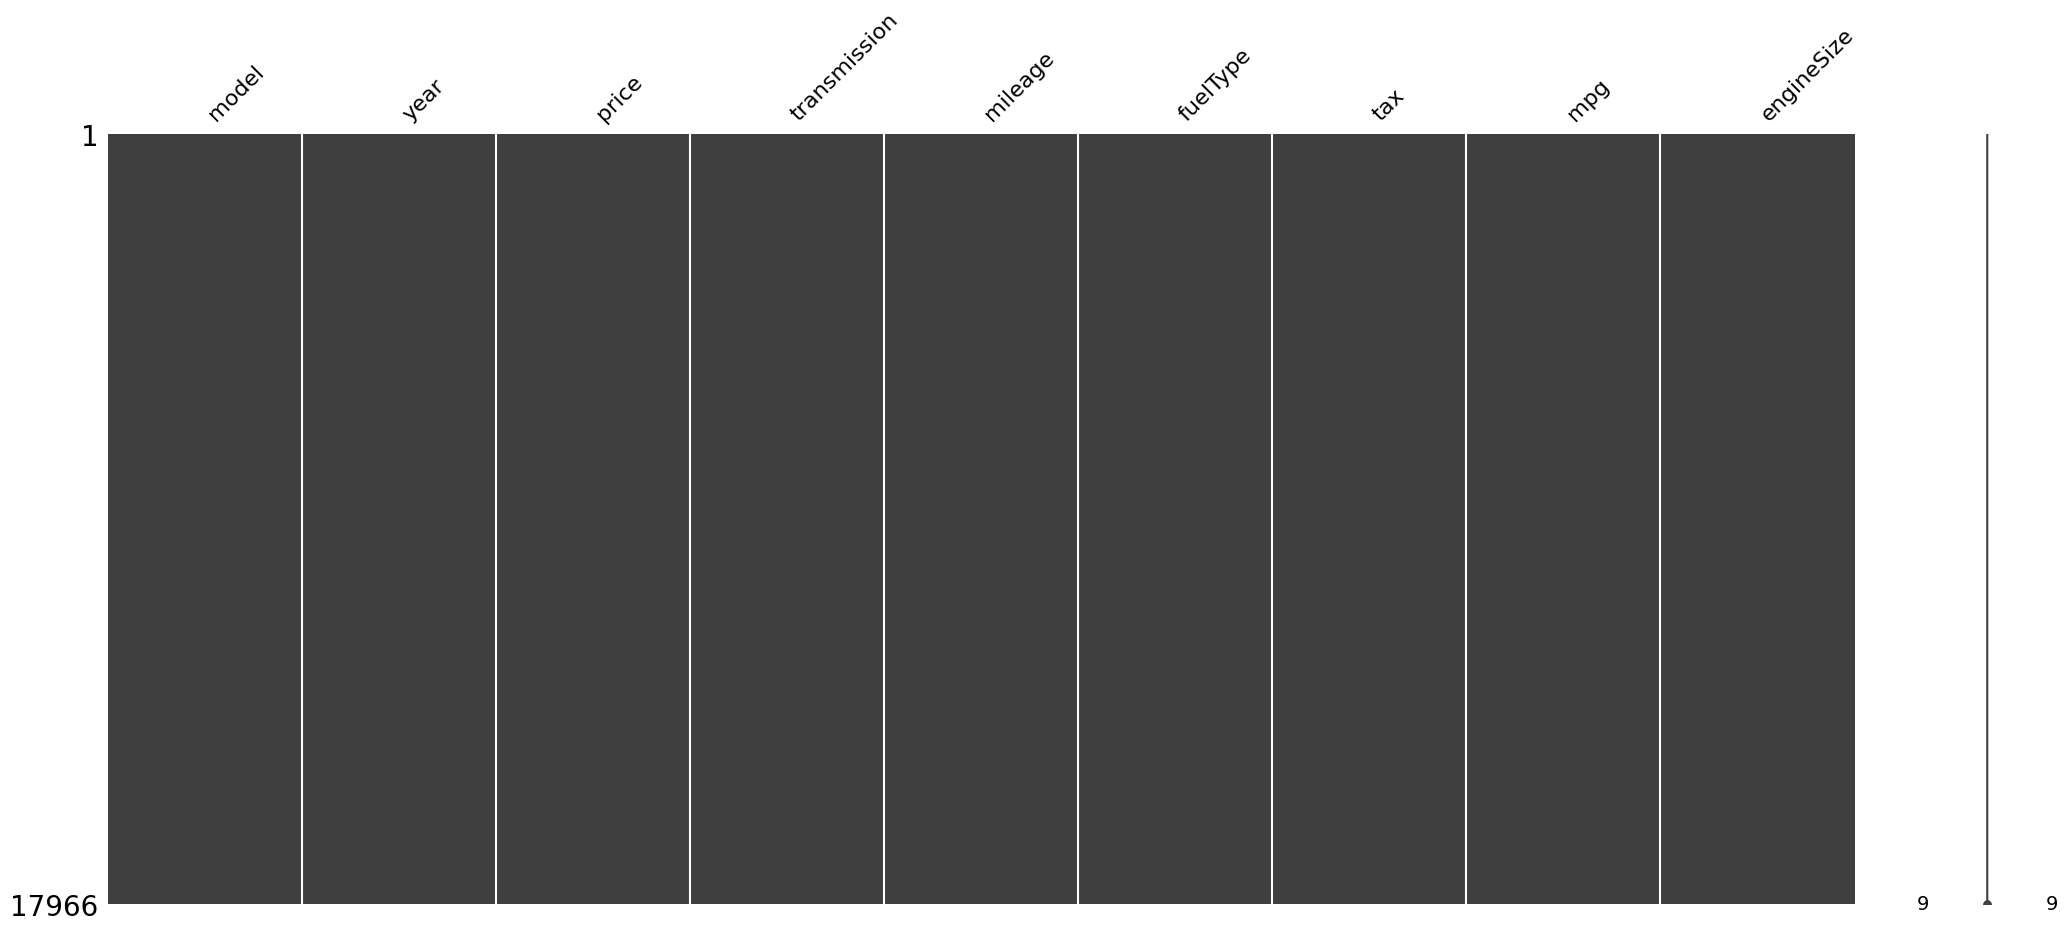

In [7]:
msn.matrix(data_copy)
#построил матрицу Null значений, но так как у нас их нет, матрица выглядет полностью заполнена

In [8]:
data_copy.groupby(by=['year']).describe()
#Посмотрел стандартные показатели столбцов по каждому году. Есть вброс 2060 года.

price                                                                   \
       count          mean          std      min       25%      50%       75%   
year                                                                            
1996     1.0   3000.000000          NaN   3000.0   3000.00   3000.0   3000.00   
1998     1.0   2699.000000          NaN   2699.0   2699.00   2699.0   2699.00   
2000     1.0   1995.000000          NaN   1995.0   1995.00   1995.0   1995.00   
2002     3.0   1928.333333   929.157324    895.0   1545.00   2195.0   2445.00   
2003     3.0   2063.000000  1780.750404    495.0   1095.00   1695.0   2847.00   
2004     4.0   1436.000000   624.270775    950.0    986.75   1249.5   1698.75   
2005    16.0   1593.000000   640.425275    675.0   1170.00   1680.0   2023.00   
2006    13.0   2202.615385   737.466783   1095.0   1775.00   2275.0   2495.00   
2007    32.0   2603.562500  1249.539940   1200.0   1770.00   2495.0   2895.00   
2008    57.0   2598.894737   993.138544    694.0   1995.00   2499.0   3199.00   
2009    91.0   3719.725275  2137.313194   1450.0   2844.50   3495.0   3995.00   
2010    67.0   4058.253731  1996.562268   1795.0   2920.00   3495.0   4750.00   
2011    94.0   5022.478723  1325.670410   2650.0   4195.00   4982.5   5687.25   
2012   115.0   5680.930435  1520.786504   2995.0   4575.00   5495.0   6495.00   
2013   609.0   6703.940887  1521.143277   2975.0   5798.00   6485.0   7299.00   
2014   805.0   7541.874534  1764.108383   3295.0   6498.00   7290.0   8299.00   
2015  1368.0   8777.817982  2162.439420   3990.0   7425.00   8295.0   9665.25   
2016  2331.0  10665.668812  3236.216361   4500.0   8500.00   9795.0  11612.50   
2017  4888.0  11965.689853  3520.699196   5750.0   9550.00  10990.5  13950.00   
2018  4014.0  13157.894619  3505.532226   6690.0  10700.00  12490.0  14799.75   
2019  3194.0  17176.449280  4210.013357   6900.0  14732.50  16599.5  18982.50   
2020   258.0  20819.872093  5767.839518  11999.0  17000.00  19995.0  22000.00   
2060     1.0   6495.000000          NaN   6495.0   6495.00   6495.0   6495.00   

              mileage                 ...     mpg        engineSize            \
          max   count           mean  ...     75%    max      count      mean   
year                                  ...                                       
1996   3000.0     1.0   50000.000000  ...  34.400   34.4        1.0  1.800000   
1998   2699.0     1.0   37000.000000  ...  41.500   41.5        1.0  1.200000   
2000   1995.0     1.0   43000.000000  ...  41.500   41.5        1.0  1.300000   
2002   2695.0     3.0  104594.666667  ...  38.450   38.7        3.0  1.700000   
2003   3999.0     3.0  107779.333333  ...  41.200   41.5        3.0  1.733333   
2004   2295.0     4.0   83309.000000  ...  45.600   45.6        4.0  1.300000   
2005   2495.0    16.0   87163.187500  ...  44.475   64.2       16.0  1.706250   
2006   3875.0    13.0   84882.000000  ...  47.100   62.8       13.0  1.500000   
2007   6995.0    32.0   84077.093750  ...  45.600   58.9       32.0  1.687500   
2008   4890.0    57.0   82800.912281  ...  47.100   67.3       57.0  1.566667   
2009  21500.0    91.0   74948.197802  ...  51.850   76.3       91.0  1.579121   
2010  15999.0    67.0   78480.223881  ...  55.400   76.3       67.0  1.564179   
2011   9199.0    94.0   70222.776596  ...  53.300   68.9       94.0  1.614894   
2012  10997.0   115.0   62108.730435  ...  58.900   85.6      115.0  1.511304   
2013  14495.0   609.0   48037.738916  ...  65.700   85.6      609.0  1.388342   
2014  14800.0   805.0   41560.573913  ...  65.700   85.6      805.0  1.380745   
2015  18992.0  1368.0   39442.958333  ...  67.300   88.3     1368.0  1.428801   
2016  28490.0  2331.0   29885.126984  ...  65.700   88.3     2331.0  1.440755   
2017  49999.0  4888.0   22549.821809  ...  65.700   88.3     4888.0  1.381281   
2018  54995.0  4014.0   15707.793971  ...  65.700   88.3     4014.0  1.227728   
2019  45250.0  3194.0    7167.833751 

In [11]:
data_copy.groupby(by=['year']).mean()
#Просмотрел средние значения столбцов по каждому столбцу. Есть вброс 2060 года.

C:\Users\User\AppData\Local\Temp\ipykernel_18932\1458973900.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_copy.groupby(by=['year']).mean()


,price,mileage,tax,mpg,engineSize
year,,,,,
1996,3000.000000,50000.000000,265.000000,34.400000,1.800000
1998,2699.000000,37000.000000,160.000000,41.500000,1.200000
2000,1995.000000,43000.000000,160.000000,41.500000,1.300000
2002,1928.333333,104594.666667,250.000000,37.700000,1.700000
2003,2063.000000,107779.333333,241.666667,37.800000,1.733333
2004,1436.000000,83309.000000,180.000000,44.525000,1.300000
2005,1593.000000,87163.187500,214.062500,41.975000,1.706250
2006,2202.615385,84882.000000,181.153846,47.038462,1.500000
2007,2603.562500,84077.093750,208.750000,42.728125,1.687500


In [10]:
data_copy.engineSize.value_counts()
#Понял, что большинство машин имеют engineSize <= 1.2. Есть машины с 0.0

1.0    7765
1.5    3418
2.0    3311
1.2    1626
1.6     923
1.1     559
1.4     112
2.3      80
0.0      51
5.0      45
1.8      35
2.2      13
2.5      13
1.3      13
3.2       1
1.7       1
Name: engineSize, dtype: int64

In [21]:
data_copy.mileage.value_counts()
#Посмотрел кол-во значений по каждой millage. Понял, что все машины минимум ехали 10 миль.

10       40
15000    38
25000    34
10000    32
9000     31
         ..
80427     1
1376      1
24376     1
23496     1
23900     1
Name: mileage, Length: 13527, dtype: int64

In [22]:
data_copy.mpg.value_counts()
#посмотрел кол-во значений по столбцу mpg

65.7    2528
54.3    1774
60.1    1674
64.2     995
57.7     962
        ... 
37.1       1
28.0       1
54.2       1
28.5       1
23.9       1
Name: mpg, Length: 90, dtype: int64

In [23]:
model_counts=data_copy["model"].value_counts()

In [24]:
model_counts
#посмотрел самые популярные виды машин

 Fiesta                   6556
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: model, dtype: int64

In [20]:
data_copy = data_copy.drop(data_copy[data_copy.year>2020].index)
data_copy.year.value_counts()
#Дропнул 2060 год

2017    4888
2018    4014
2019    3194
2016    2331
2015    1368
2014     805
2013     609
2020     258
2012     115
2011      94
2009      91
2010      67
2008      57
2007      32
2005      16
2006      13
2004       4
2002       3
2003       3
1998       1
1996       1
2000       1
Name: year, dtype: int64

In [25]:
cor = data_copy.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_18932\2257580350.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data_copy.corr()


In [26]:
cor.style.background_gradient()
#построил кореляционную матрицу и посмотрел взаимосвязь между столбцами. С ценной машины не связан mileage, mpg, остальные столбцы связаны

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.645465,-0.718668,0.300518,-0.021488,-0.139170
price,0.645465,1.000000,-0.530610,0.406999,-0.346557,0.411203
mileage,-0.718668,-0.530610,1.000000,-0.260619,0.120225,0.215040
tax,0.300518,0.406999,-0.260619,1.000000,-0.502919,0.184365
mpg,-0.021488,-0.346557,0.120225,-0.502919,1.000000,-0.260528
engineSize,-0.139170,0.411203,0.215040,0.184365,-0.260528,1.000000


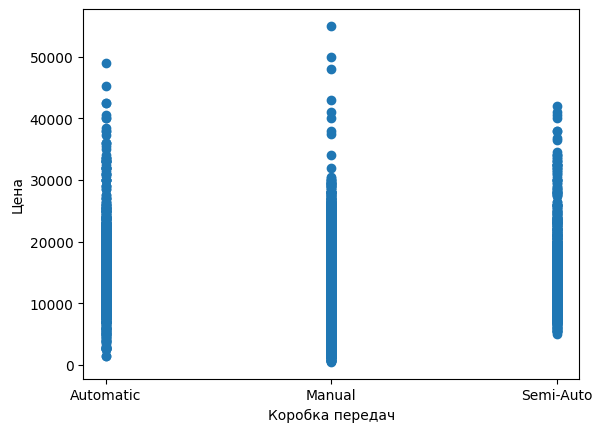

In [30]:
plt.scatter(data_copy.transmission, data_copy.price)
plt.xlabel("Коробка передач")
plt.ylabel("Цена")
plt.show()
#Посмотрел взаимосвязь между ценой и видом коробки передач

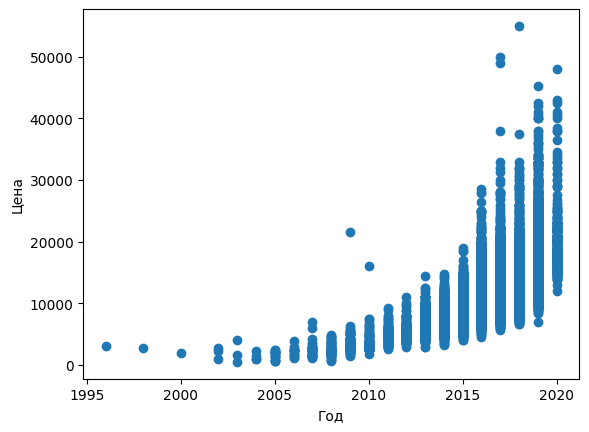

In [29]:
plt.scatter(data_copy.year, data_copy.price)
plt.xlabel("Год")
plt.ylabel("Цена")
plt.show()
#Взаимосвязь между ценой и годом машины

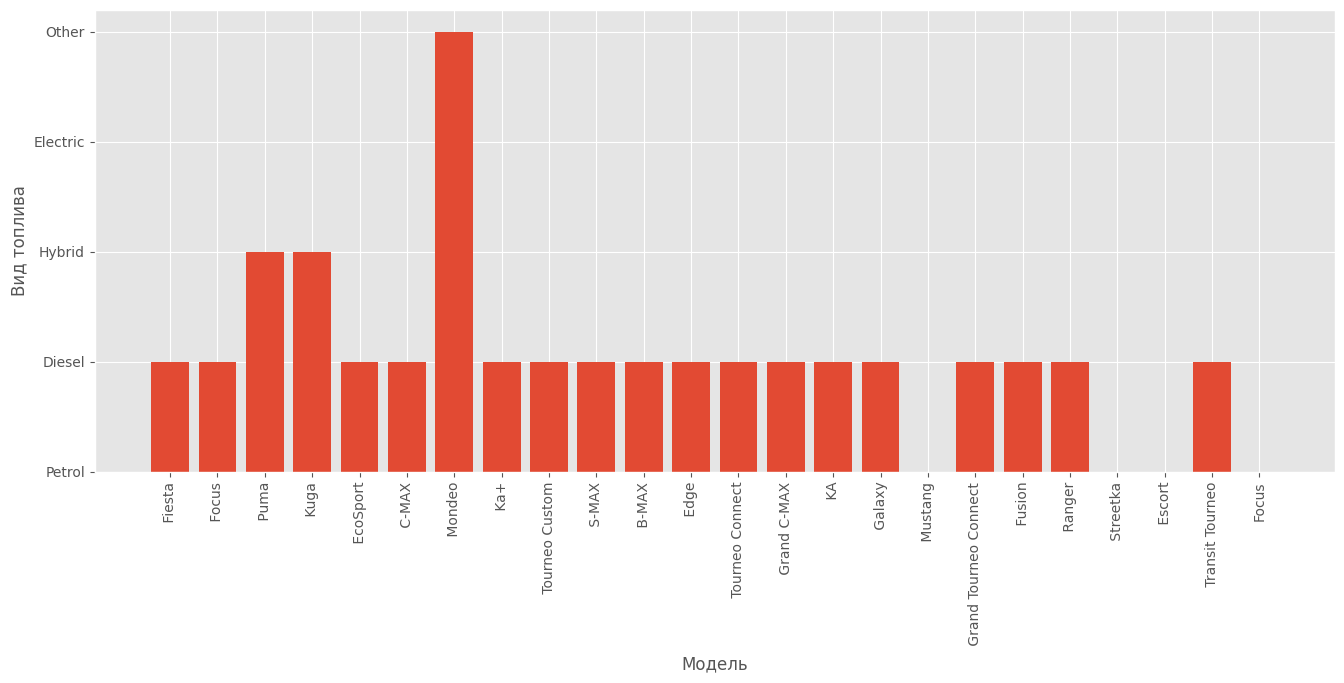

In [32]:
plt.style.use("ggplot")
plt.figure(figsize=(16,6))
plt.bar(data_copy["model"],data_copy["fuelType"])
plt.xlabel("Модель")
plt.ylabel("Вид топлива") 
plt.xticks(rotation=90)
plt.show()
#статистика по модели и их типу топлива

In [34]:
def pie(column):
    data_pie=data_copy[column].value_counts()
    plt.figure(figsize=(6,6))
    plt.style.use("fivethirtyeight")
    plt.pie(data_pie.values,labels=data_pie.index,autopct="%1.1f%%")
    plt.title(column)
    plt.show()
#функция для визуализации по % популярности виды коробки

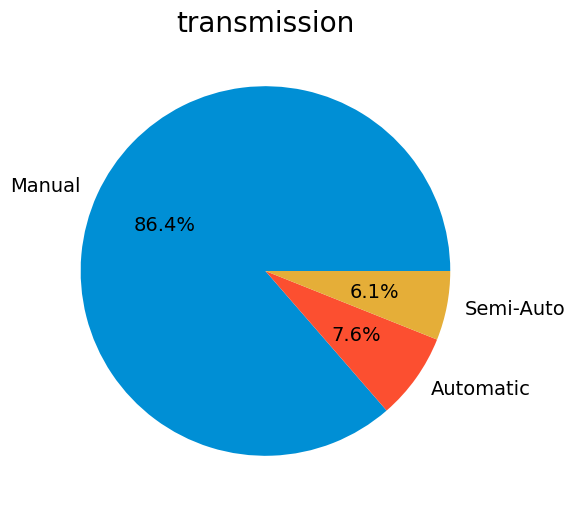

In [35]:
pie('transmission')

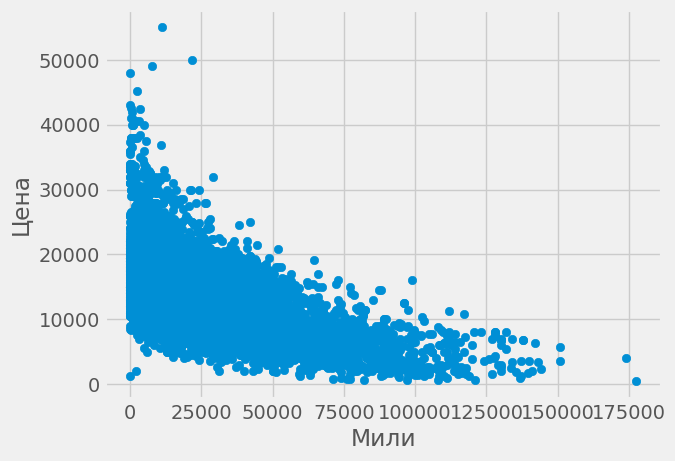

In [36]:
plt.scatter(data_copy.mileage, data_copy.price)
plt.xlabel("Мили")
plt.ylabel("Цена")
plt.show()
#Визуализация по сравнению цены от миль

In [6]:
ydata_profiling.ProfileReport(data_copy)
#провел анализ и посмотрел все через pandas-profiling. По этим данным я понял тоже самое, что было и на других графиках которые были до, но удобно
#и быстро собраны через эту библиотеку. Здесь я посмотрел на пропцщенные значения, их процент от общего кол-ва, сколько всего значений в датасете, нашел дубликаты, 
#просмотрел матрицу корреляций и взаимоотношения между различными двумя столбцами.


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
data_copy = data_copy.drop('price', axis=1)
data_copy
#Удалил столбец с целевой переменной

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,Manual,5007,Petrol,145,57.7,1.2


In [12]:
label = LabelEncoder()
data_copy['transmission'] = label.fit_transform(data_copy['transmission'])
data_copy['model'] = label.fit_transform(data_copy['model'])
data_copy['fuelType'] = label.fit_transform(data_copy['fuelType'])
#Поменял через функцию все строки в Int значения

In [13]:
data_copy.info()
#Проверил всю информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  int32  
 1   year          17966 non-null  int64  
 2   transmission  17966 non-null  int64  
 3   mileage       17966 non-null  int64  
 4   fuelType      17966 non-null  int32  
 5   tax           17966 non-null  int64  
 6   mpg           17966 non-null  float64
 7   engineSize    17966 non-null  float64
dtypes: float64(2), int32(2), int64(4)
memory usage: 982.6 KB


In [16]:
X = data_copy
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#Обучил модель на данных по целевому столбцу

In [17]:
r2
#посмотрел процент точности

0.7365884288851106

In [18]:
mae
#посмотрел отклонение

1776.8255281707357